# Lecture 6: Lovely Pandas

## Contents
- [Imports](#section1)
- [Datasets](#section4)
    - [Data representation](#subsection4.1)
    - [Type of variables](#subsection4.2)
- [Pandas for data analysis](#section5)
    - [The <code>pandas.Series</code> data structure](#subsection5.1)
    - [The <code>pandas.DataFrame</code> data structure](#subsection5.2)
- [Basics of descriptive analytics](#section6)
    - [Read data from files](#subsection6.1)
    - [Descriptive measures](#subsection6.2)
    - [Visualize measures](#subsection6.3)
    - [Handling missing data](#subsection6.4)
- [Case studies](#section7)
    - [Case study 1: Singapore condo prices](#subsection7.1)

## Imports <a id="section1"></a>

In all future lectures, we will follow the PEP 8 Coding Style Guide to import all packages at the top of the Jupyter file. **Please make sure that you run the first code cell to import necessary packages before you run the subsequent code**. 

In [3]:
import numpy as np                  # Import the NumPy package for array-based data
import matplotlib.pyplot as plt     # Import the data visualization package Matplotlib
import pandas as pd                 # Import the pandas package for data frames

## Datasets <a id="section4"></a>

### Data representation <a id="subsection4.1"></a>
A dataset is a collection, or a table of data. 

<div class="alert alert-block alert-success">
<b>Example 6:</b> The following table contains a cross-sectional dataset on a number of working individuals for the year 1976 (<a href="https://www.amazon.com/Introductory-Econometrics-Modern-Approach-Economics/dp/1111531048">Introductory Econometrics: A Modern Approach</a>). Columns of the data table are summarized as follows.
  <li><b>wage</b>: average hourly earnings (in dollars)</li>
  <li><b>educ</b>: years of education</li>
  <li><b>exper</b>: years of potential experience</li>
  <li><b>gender</b>: genders of these working individuals</li>
    <li><b>married</b>: <b>True</b> if married, and <b>False</b> otherwise</li>
</div> 

| $ $ |wage	| educ	| exper	| gender | married |
|:---:|:---:|:-----:|:-----:|:------:|:-------:|
|<b>0</b> |	3.10 |	11.0 |	2.0 | 	Female | <code>False</code>|
|<b>1</b> |	3.24 |	12.0 |	22.0|	Female | <code>True</code> |
|<b>2</b> |	3.00 |	11.0 |	2.0 |	Male	| <code>False</code> |
|<b>3</b> |	6.00 |	8.0  |	44.0|	Male	| <code>True</code> |
|<b>4</b> |	5.30 |	12.0 |	7.0 |	Male | <code>True</code> |
|<b>5</b> |	8.75 |	16.0 |	9.0 |	Male | <code>True</code>|

Typically a **dataset** is organized data as a rectangular array, with **variables** in **columns** and **observations** in **rows**. 

A **variable** (or **field**, or **attribute**) is a characteristic of each individual in the dataset. In this case, four companies are represented by four variables. An **observation** (or **case**, or **record**) is a collection of all variable values for an individual of the dataset. As you can see that the example above contains 6 observations.

### Types of variables <a id="subsection4.2"></a>
You may notice that in the dataset above, we usually have two different variable types: 
1. **Numerical data**: wages, years of education and working experience
2. **Categorical data**: gender, and marriage status

There may be other types of variables, such as strings (like names), or dates that make the dataset into a time series.

In Python and many other programming languages, the Boolean status <code>True</code> has a numeric value <code>1</code>, and <code>False</code> has a value of <code>0</code>. The numeric values can be obtained by data type conversions, as shown by the code below. 

In [2]:
print(int(True))    # Convert True to its numeric value
print(int(False))   # Convert False to its numeric value

1
0


## Pandas for data analysis <a id="section5"></a>

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a <code>DataFrame</code> data structure. <code>DataFrame</code> objects are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. Besides offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs. In this lecture, we will introduce two data types imported from the Pandas package: <code>DataFrame</code> as an analog of two-dimensional arrays, and <code>Series</code> as an analog of one-dimensional arrays.

### The <code>pandas.Series</code> data structure <a id="subsection5.1"></a>
#### Create a <code>pandas.Series</code> object
A <code>pandas.Series</code> is a one-dimensional array of **indexed data**. It can be created from another one-dimensional array-like object, such as a <code>list</code> or a NumPy array. 

In [3]:
wage = pd.Series([3.10, 3.24, 3.00, 6.00, 5.30, 8.75])
wage

0    3.10
1    3.24
2    3.00
3    6.00
4    5.30
5    8.75
dtype: float64

In [4]:
educ = pd.Series(np.array([11.0, 12.0, 11.0, 8.0, 12.0, 16.0]))
educ

0    11.0
1    12.0
2    11.0
3     8.0
4    12.0
5    16.0
dtype: float64

#### Values and indices of <code>pandas.Series</code> objects
It can be seen from the outputs above, the <code>pandas.Series</code> wraps both a sequence of values and a sequence of indices, which can be accessed by the attributes <code>values</code> and <code>index</code>.

In [5]:
wage.values         # The values are formated as a NumPy array

array([3.1 , 3.24, 3.  , 6.  , 5.3 , 8.75])

In [6]:
wage.index          # The data type of index is RangeIndex by default

RangeIndex(start=0, stop=6, step=1)

Notice that the <code>values</code> attribute gives all values as a NumPy array, and as default, the <code>index</code> attribute gives all integer indices as a <code>RangeIndex</code> type object, which is very similar to the <code>range</code> type data structure. 

Besides default case, indices of a <code>pandas.Sereis</code> object may also be other numeric values or strings. They can be specified by keyword argument <code>index</code> when calling the <code>pandas.Series()</code> function, as shown by the following example.

In [7]:
index = ['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben']
exper = pd.Series([2.0, 22.0, 2.0, 44.0, 7.0, 9.0],
                  index=index)  # Specify series indices

exper

Mary      2.0
Ann      22.0
John      2.0
David    44.0
Frank     7.0
Ben       9.0
dtype: float64

In [8]:
exper.values

array([ 2., 22.,  2., 44.,  7.,  9.])

In [9]:
exper.index

Index(['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben'], dtype='object')

#### Indexing and slicing of <code>pandas.Series</code> objects via brackets <code>[]</code>

Items in a <code>pandas.Series</code> object can be accessed via two sets of indexing systems:
- **Label based indices**, which can be retrieved via the <code>index</code> attribute of the series. The label-based indices can be either integers, or strings.
- **Integer-position based indices**, which uses integers 0, 1, 2, ..., to mark the position of each item. 

<img src="https://github.com/XiongPengNUS/test/blob/master/Screen%20Shot%202020-06-18%20at%2012.21.24%20PM.png?raw=true" width=600>

As the default case, the label based indices are the same as the integer-position based indices. You may notice that it is very similar to a <code>list</code> type data structure, so we can access items in a series by the same indexing and slicing syntax as the <code>list</code> type objects.

In [10]:
print(wage[2], '\n')    # Print the third item of the series
print(wage[:3], '\n')   # Print the first three items in the series
print(wage[-2:])        # Print the last two items in the series

3.0 

0    3.10
1    3.24
2    3.00
dtype: float64 

4    5.30
5    8.75
dtype: float64


The indices formated as a <code>list</code> or an array can also be used to access multiple items in a series.

In [11]:
print(educ[[3, 2, 0]], '\n')
print(educ[[1]])

3     8.0
2    11.0
0    11.0
dtype: float64 

1    12.0
dtype: float64


For the variable <code>exper</code>, the label-based indices are user-specified, so they are different from the integer-position based indices. For such cases, the label-based indices are similar to Python dictionaries, so the indexing syntax is also similar to <code>dict</code> type objects. 

In [12]:
print(exper['John'])
print(exper['Ann'])

2.0
22.0


Please note that Python dictionaries do not support slicing syntax to retrieve multiple items, but the slicing expressions of indices can be used in series to access multiple items. 

In [13]:
print(exper['John':], '\n')
print(exper[:'Ann'], '\n')
print(exper[['John', 'Ann']])

John      2.0
David    44.0
Frank     7.0
Ben       9.0
dtype: float64 

Mary     2.0
Ann     22.0
dtype: float64 

John     2.0
Ann     22.0
dtype: float64


<div class="alert alert-block alert-danger">
<b>Notes</b>:  In the slicing expressions for label based indices, the item indexed by <b>stop</b> are included in the selection. This is different from the list style slicing syntax we learned before. 
</div>

The <code>list</code> style indexing and slicing expressions can also be used to select items according to the integer-position based indices. 

In [14]:
print(exper[3], '\n')       # Print the fourth item 
print(exper[:2], '\n')      # Print the first two items 
print(exper[-3:], '\n')     # Print the last three items 
print(exper[[2, 0, 1]])     # Print items with given integer indices

44.0 

Mary     2.0
Ann     22.0
dtype: float64 

David    44.0
Frank     7.0
Ben       9.0
dtype: float64 

John     2.0
Mary     2.0
Ann     22.0
dtype: float64


From examples above, we can summarize the syntax of indexing and slicing via the square brackets <code>[]</code> as follows:
- If the label based indices are the same as the integer-position based indices (default cases), then the <code>list</code> style syntax is always used to access series items. 
- If the label base indices are different from the default integer-position based indices:
    - If the indices are given as an **integer**, a list or a slicing expression of **integers**, then the <code>list</code> style syntax (integer-position based indices) is used, where the <code>stop</code> index is excluded from the selection.
    - If the indices are given as a **label**, a list or a slicing expression of **labels**, then the indexing or slicing expressions refer to the label-based indices, where the <code>stop</code> index is included in the selection. 


#### Indexers: <code>loc[]</code> and <code>iloc[]</code>
The label based and integer-position based indexing schemes could be confusing sometimes because they are both placed in the square brackets <code>[]</code>. In order to avoid such confusion, Pandas provides some special indexer attributes that explicitly indicate which indexing scheme we are using. Among these special indexers, <code>loc[]</code> is aimed for label based indexing and slicing expressions. 

In [15]:
print(exper.loc['Ann'], '\n')
print(exper.loc['Frank':], '\n')
print(exper.loc[['Mary', 'John']], '\n')
print(exper.loc[::2])

22.0 

Frank    7.0
Ben      9.0
dtype: float64 

Mary    2.0
John    2.0
dtype: float64 

Mary     2.0
John     2.0
Frank    7.0
dtype: float64


The integer-position based indexing and slicing expressions can be specified by the <code>iloc[]</code> indexer.

In [16]:
print(exper.iloc[1], '\n')
print(exper.iloc[4:], '\n')
print(exper.iloc[[0, 2]], '\n')
print(exper.iloc[::2])

22.0 

Frank    7.0
Ben      9.0
dtype: float64 

Mary    2.0
John    2.0
dtype: float64 

Mary     2.0
John     2.0
Frank    7.0
dtype: float64


To sum up, the syntax of indexers <code>loc[]</code> and <code>iloc[]</code> is much more explicit and straightforward:
- The indexer <code>loc[]</code> is for label based indices, the <code>stop</code> index is inclusive.
- The indexer <code>iloc[]</code> is for integer-position based indices, the <code>stop</code> index is exclusive. 

<div class="alert alert-block alert-warning">
<b>Coding Style</b>:  One guiding principle of Python code is that "explicit is better than implicit." The explicit nature of <b>loc</b> and <b>iloc</b> make them very useful in maintaining clean and readable code; especially in the case of integer indexes.
</div>

Examples above show that the label based indices and integer-position based indices can be explicitly referred to by the <code>loc[]</code> and <code>iloc[]</code> indexers. 

In cases where the label based indices are exactly the same as the integer-position based indices, please be very careful that the <code>stop</code> index is included in the <code>loc</code> slicing expression but excluded from the <code>iloc</code> slicing expression. 

In [17]:
print(wage.loc[:2], '\n')   # Index 2 is included
print(wage.iloc[:2])        # Index 2 is excluded

0    3.10
1    3.24
2    3.00
dtype: float64 

0    3.10
1    3.24
dtype: float64


### The <code>pandas.DataFrame</code> data structure <a id="subsection5.2"></a>

The next fundamental structure in Pandas is the <code>pandas.DataFrame</code>. Like the <code>pandas.Series</code> object discussed in the previous section, the <code>pandas.DataFrame</code> object can be thought of either as a generalization of a NumPy two-dimensional array, or as a specialization of a Python dictionary.

#### Create a <code>pandas.DataFrame</code> object
A <code>pandas.DataFrame</code> object can be created from a dictionary, as shown by the example below.

In [18]:
data_dict = {'wage': [3.10, 3.24, 3.00, 6.00, 5.30, 8.75],
             'educ': [11.0, 12.0, 11.0, 8.0, 12.0, 16.0],
             'exper': [2.0, 22.0, 2.0, 44.0, 7.0, 9.0],
             'gender': ['Female', 'Female', 'Male', 'Male', 'Male', 'Male'],
             'married': [False, True, False, True, True, True]}

data_frame = pd.DataFrame(data_dict)    # Create a DataFrame object
data_frame                              # Display the DataFrame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
2,3.00,11.0,2.0,Male,False
3,6.00,8.0,44.0,Male,True
4,5.30,12.0,7.0,Male,True
5,8.75,16.0,9.0,Male,True


It can be seen that the <code>DataFrame</code> object is created by the function <code>DataFrame()</code> from the <code>dict</code> type variable <code>data_dict</code>, where the keys are the names of variables, and the value of each key is a list containing the corresponding variable values. You may verify the data types of these two variables by the following code.

In [19]:
type(data_dict)

dict

In [20]:
type(data_frame)

pandas.core.frame.DataFrame

Similar to series, we define "column index" and "row index" as the following graph, and they can be accessed by attributes <code>columns</code> and <code>index</code>, respectively. 

<img src="https://github.com/XiongPengNUS/test/blob/master/Screen%20Shot%202020-06-20%20at%206.05.58%20PM.png?raw=true" width=500>

In [21]:
data_frame.columns

Index(['wage', 'educ', 'exper', 'gender', 'married'], dtype='object')

In [22]:
data_frame.index

RangeIndex(start=0, stop=6, step=1)

It can be seen that the <code>index</code> attribute of <code>data_frame</code> has the same default values as the series. The row indices can also be specified by the keyword argument <code>index</code> when calling the <code>pandas.DataFrame()</code> function in creating the <code>pandas.DataFrame</code> object. 

In [23]:
index = ['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben']
data_frame_new = pd.DataFrame(data_dict, index=index)  

data_frame_new

,wage,educ,exper,gender,married
Mary,3.10,11.0,2.0,Female,False
Ann,3.24,12.0,22.0,Female,True
John,3.00,11.0,2.0,Male,False
David,6.00,8.0,44.0,Male,True
Frank,5.30,12.0,7.0,Male,True
Ben,8.75,16.0,9.0,Male,True


The row indices are thus different from the default values, as shown by the following code.

In [24]:
data_frame_new.index

Index(['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben'], dtype='object')

#### Accessing columns and rows of <code>pandas.DataFrame</code> via brackets <code>[]</code>

Similar to other array-like data types, like <code>list</code>, <code>dict</code>, and NumPy arrays, a part of the data frame can be selected simply by placing the indices in the square brackets <code>[]</code>. Since the data frame object is an analog of a two-dimensional array, we need to explicitly indicate whether the given indices are for the rows or columns.

<div class="alert alert-block alert-danger">
<b>Notes:</b> The syntax of using square bracket indices to access row or columns is different:
        <li> A single column index or a list of multiple column indices is used to access <b>columns</b> by the label based indices.</li>
        <li> A slicing expression is used to access <b>rows</b>. </li>
</div>

The following code demonstrates accessing a column via its label-based index. Please note that the data type of the selected column is <code>pandas.Series</code>.

In [25]:
wage = data_frame['wage']              # Access one column
wage

0    3.10
1    3.24
2    3.00
3    6.00
4    5.30
5    8.75
Name: wage, dtype: float64

In [26]:
type(wage)

pandas.core.series.Series

We may also take two columns at the same time by placing column indices in the same list (or other array-like objects). The data type of the result is <code>pandas.DataFrame</code>, no matter how many columns you are accessing. 

In [27]:
skills = data_frame[['educ', 'exper']]  # Access two columns
skills

,educ,exper
0,11.0,2.0
1,12.0,22.0
2,11.0,2.0
3,8.0,44.0
4,12.0,7.0
5,16.0,9.0


In [28]:
type(skills)

pandas.core.frame.DataFrame

Rows of data frames can be selected via slicing expressions of integer-position or label-based indices. 

In [29]:
john = data_frame_new[2:3]
john

,wage,educ,exper,gender,married
John,3.0,11.0,2.0,Male,False


In [30]:
david = data_frame_new['David':'Frank']
david

,wage,educ,exper,gender,married
David,6.0,8.0,44.0,Male,True
Frank,5.3,12.0,7.0,Male,True


It can be seen from the examples above that whether we select rows or columns is determined by the data type enclosed in the square brackets <code>[]</code>. You need to be extremely careful when using them. 

#### Indexers: <code>loc[]</code> and <code>iloc[]</code>

Similar to the series cases, it is recommended to select data from <code>pandas.DataFrame</code> via the indexers <code>iloc[]</code> and <code>loc</code> because they are safer and more explicit compared with directly using the square brackets. The syntax of using these indexers is summarized in the following picture. 

<img src="https://github.com/XiongPengNUS/test/blob/master/Screen%20Shot%202020-06-17%20at%2011.37.37%20PM.png?raw=true" width=600>


Similar to series, we may also use the <code>iloc</code> syntax to access a subset of <code>pandas.DataFrame</code> through the integer-position based indices of rows and columns, regardless of the data type of indices, as shown by the following examples. 

In [31]:
"""
A subset containing two columns, and the 2nd and the 3rd rows
The subset is accessed via iloc[]
"""

data_subset = data_frame.iloc[1:3, 1:3]
data_subset 

,educ,exper
1,12.0,22.0
2,11.0,2.0


The same <code>iloc[]</code> syntax can also be applied to cases where the row indices are different from the default integer indices.

In [32]:
"""
A subset containing two columns, and the 2nd and the 3rd rows
The subset is accessed via iloc[]
"""

data_new_subset = data_frame_new.iloc[1:3, 1:3]
data_new_subset 

,educ,exper
Ann,12.0,22.0
John,11.0,2.0


Likewise, the <code>loc[]</code> indexers select items via label-based indices.

In [33]:
"""
A subset containing two columns, and the 2nd and the 3rd rows
The subset is accessed via loc[]
"""

data_subset = data_frame.loc[1:2, 'educ':'exper']
data_subset 

,educ,exper
1,12.0,22.0
2,11.0,2.0


<div class="alert alert-block alert-danger">
<b>Notes</b>: In the slicing expressions for the label based indices, the item indexed by <b>stop</b> are included in the selection. This is different from the <b>list</b> style syntax. 
</div>

Some extra examples are provided below to demonstrate how to use <code>loc[]</code> when the row labels are not default integers.

In [34]:
"""
A subset containing two columns, and the 2nd and the 3rd rows
The subset is accessed via loc[]
"""

data_new_subset = data_frame_new.loc['John':'Ben', 
                                     'educ':'exper']
data_new_subset 

,educ,exper
John,11.0,2.0
David,8.0,44.0
Frank,12.0,7.0
Ben,16.0,9.0


In [35]:
"""
A subset containing two columns, and the 2nd and the 3rd rows
The subset is accessed via loc[]
"""

data_new_subset = data_frame_new.loc[['John', 'Ben'], 
                                     ['educ', 'exper']]
data_new_subset 

,educ,exper
John,11.0,2.0
Ben,16.0,9.0


If the column positions/labels are not specified, both <code>iloc[]</code> and <code>loc[]</code> take all columns as a default case. Alternatively, you can use <code>:</code> to select all columns/rows. Check the examples below.

In [36]:
cols = data_frame.iloc[:, [1, 3]] 
cols

,educ,gender
0,11.0,Female
1,12.0,Female
2,11.0,Male
3,8.0,Male
4,12.0,Male
5,16.0,Male


In [37]:
rows = data_frame_new.loc['John':'Ben', :]  
rows

,wage,educ,exper,gender,married
John,3.00,11.0,2.0,Male,False
David,6.00,8.0,44.0,Male,True
Frank,5.30,12.0,7.0,Male,True
Ben,8.75,16.0,9.0,Male,True


The <code>:</code> symbol can be omitted if it is used to select all columns. 

In [38]:
rows = data_frame_new.loc['John':'Ben']  
rows

,wage,educ,exper,gender,married
John,3.00,11.0,2.0,Male,False
David,6.00,8.0,44.0,Male,True
Frank,5.30,12.0,7.0,Male,True
Ben,8.75,16.0,9.0,Male,True


Please note that if only one column or one row is taken, the data type of the results could be <code>pandas.Sereis</code> or <code>pandas.DataFrame</code>

In [39]:
data_frame_new.loc['John']      # One row as a series

wage         3.0
educ        11.0
exper        2.0
gender      Male
married    False
Name: John, dtype: object

In [40]:
data_frame_new.loc[['John']]    # One row as a data frame

,wage,educ,exper,gender,married
John,3.0,11.0,2.0,Male,False


In [41]:
data_frame.iloc[:, 2]           # One column as a series

0     2.0
1    22.0
2     2.0
3    44.0
4     7.0
5     9.0
Name: exper, dtype: float64

In [42]:
data_frame.iloc[:, 2:3]         # One column as a data frame

,exper
0,2.0
1,22.0
2,2.0
3,44.0
4,7.0
5,9.0


Can you tell why the data types of the results are different?

#### Modify a subset of a <code>pandas.DataFrame</code> object <a id="subsection2.5"></a>
Similar to data types like <code>list</code> or <code>dict</code>, the <code>pandas.DataFrame</code> objects are also mutable, and we can modify a part of a data frame using the <code>iloc[]</code> and <code>loc[]</code> indexers. 

In [43]:
data_frame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
2,3.00,11.0,2.0,Male,False
3,6.00,8.0,44.0,Male,True
4,5.30,12.0,7.0,Male,True
5,8.75,16.0,9.0,Male,True


In [44]:
data_frame.loc[2:3, 'educ'] = 9.0  
data_frame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
2,3.00,9.0,2.0,Male,False
3,6.00,9.0,44.0,Male,True
4,5.30,12.0,7.0,Male,True
5,8.75,16.0,9.0,Male,True


In [45]:
data_frame.iloc[2, 1:3] = 1.0   
data_frame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
2,3.00,1.0,1.0,Male,False
3,6.00,9.0,44.0,Male,True
4,5.30,12.0,7.0,Male,True
5,8.75,16.0,9.0,Male,True


The same modification via <code>loc</code> can even by used to create new columns of the <code>pandas.DataFrame</code>. 

In [46]:
data_frame.loc[:, 'remarks'] = 'none'
data_frame

,wage,educ,exper,gender,married,remarks
0,3.10,11.0,2.0,Female,False,none
1,3.24,12.0,22.0,Female,True,none
2,3.00,1.0,1.0,Male,False,none
3,6.00,9.0,44.0,Male,True,none
4,5.30,12.0,7.0,Male,True,none
5,8.75,16.0,9.0,Male,True,none


Since "remarks" is not a label in the old data table, a new column named "remarks" is appended as a new column of the table. 

#### Boolean <code>pandas.Series</code> and boolean indexing <a id="subsection2.6"></a>
We can create a boolean type <code>pandas.Series</code> via the following boolean statements and logical operators.

In [47]:
is_female = data_frame['gender'] == 'Female'      
is_female

0     True
1     True
2    False
3    False
4    False
5    False
Name: gender, dtype: bool

In [48]:
is_high_wage = data_frame['wage'] > 4
is_high_wage

0    False
1    False
2    False
3     True
4     True
5     True
Name: wage, dtype: bool

In [49]:
# Intersection of two conditions: True if both of them are True

is_wife = (data_frame['gender']=='Female') & (data_frame['married'])
is_wife

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In the code above, the symbol <code>&</code> implies element-wise "and" logic, so it returns <code>True</code> only if both conditions are <code>True</code> and <code>False</code> if either one of them is <code>False</code>. Similarly, <code>|</code> is used to indicate "or" logic, <code>~</code> suggests "not", and <code>!=</code> is still "not equal", as demonstrated by the following examples.

In [50]:
# Union of two conditions: True if either of them is True

is_skillful = (data_frame['educ']>9) | (data_frame['exper']>3)
is_skillful

0     True
1     True
2    False
3     True
4     True
5     True
dtype: bool

In [51]:
not_female = data_frame['gender'] != 'Female'
not_female

0    False
1    False
2     True
3     True
4     True
5     True
Name: gender, dtype: bool

Such boolean <code>pandas.Series</code> can be used as the row labels in <code>loc</code> to access or to modify a subset of rows that satisfy some given conditions. For example, we may be able to achieve a <code>pandas.DataFrame</code> object that contains only females.

In [52]:
is_female = data_frame['gender'] == 'Female'    # A boolean Series 
female = data_frame.loc[is_female]              # Select rows indicated by True
female

,wage,educ,exper,gender,married,remarks
0,3.10,11.0,2.0,Female,False,none
1,3.24,12.0,22.0,Female,True,none


In [53]:
is_wife = (data_frame['gender']=='Female') & (data_frame['married'])
data_frame.loc[is_wife, 'remarks'] = 'Wife'   
data_frame

,wage,educ,exper,gender,married,remarks
0,3.10,11.0,2.0,Female,False,none
1,3.24,12.0,22.0,Female,True,Wife
2,3.00,1.0,1.0,Male,False,none
3,6.00,9.0,44.0,Male,True,none
4,5.30,12.0,7.0,Male,True,none
5,8.75,16.0,9.0,Male,True,none


Please change values of the column <code>remarks</code> by yourself according to the following rule:
- The value for married male is changed to the string <code>'Husband'</code>;
- The value for unmarried male or female is changed to the string <code>'Single'</code>. 

In [54]:
is_husband = (data_frame['gender']=='Male') & (data_frame['married'])
data_frame.loc[is_husband, 'remarks'] = 'Husband'   

is_single = data_frame['married'] == False
data_frame.loc[is_single, 'remarks'] = 'Single'

data_frame

,wage,educ,exper,gender,married,remarks
0,3.10,11.0,2.0,Female,False,Single
1,3.24,12.0,22.0,Female,True,Wife
2,3.00,1.0,1.0,Male,False,Single
3,6.00,9.0,44.0,Male,True,Husband
4,5.30,12.0,7.0,Male,True,Husband
5,8.75,16.0,9.0,Male,True,Husband


## Basics of descriptive analytics <a id="section6"></a>


### Read data from files <a id="subsection6.1"></a>

In fact, the method introduced in the previous section is rarely used in creating <code>pandas.DataFrame</code> data structures, because directly typing in the data into a dictionary is inefficient and tedious. In practical implementation, it is more common to read data from a file, as the example below.

In [55]:
data = pd.read_csv('wage.csv')  # Read data from a file "wage.csv"
data.head(6)                    # Return the first six rows of data

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
2,3.00,11.0,2.0,Male,False
3,6.00,8.0,44.0,Male,True
4,5.30,12.0,7.0,Male,True
5,8.75,16.0,9.0,Male,True


### Descriptive measures <a id="subsection6.2"></a>
**Descriptive analytics** creates a summary of historical data to yield useful information and possibly prepare the data for further analysis. Such information may include some basic descriptive measures of data and graphs showing important insights.

#### Centers, variations, and extreme points
The center of data is usually expressed by the mean value of the median, which can be easily achieved by the corresponding methods.

In [56]:
print(data.select_dtypes(exclude='object').mean(), '\n')    # Mean value of each column
print(type(data.select_dtypes(exclude='object').mean()))    # Show the data type of the results

wage        5.896103
educ       12.562738
exper      17.017110
married     0.608365
dtype: float64 

<class 'pandas.core.series.Series'>


In [57]:
print(data.select_dtypes(exclude='object').median(), '\n')  # Median value of each column
print(type(data.select_dtypes(exclude='object').median()))  # Show the data type of the results

wage        4.65
educ       12.00
exper      13.50
married     1.00
dtype: float64 

<class 'pandas.core.series.Series'>


Please note that the mean value of each column is stored in a <code>pandas.Series</code>, where the indices are variable names, rather than the integer positions. 

Also notice that in the case of the categorical variable <code>married</code>, the mean value $0.608365$ is the proportion of observations in the dataset labeled as "married". This is because the <code>True</code> or <code>False</code> boolean values are converted to ones or zeros, so that the mean value is the same as the proportion of <code>True</code>s (ones).

Similarly, the measures of standard deviations and variances can be calculated by the corresponding methods.

In [58]:
data.select_dtypes(exclude='object').std()         # Sample Standard deviation of each numeric column

wage        3.693086
educ        2.769022
exper      13.572160
married     0.488580
dtype: float64

In [59]:
data.select_dtypes(exclude='object').var()         # Sample Variance of each numeric column

wage        13.638884
educ         7.667485
exper      184.203516
married      0.238711
dtype: float64

The maximum and minimum points in the dataset can also be found.

In [60]:
data.select_dtypes(exclude='object').max()         # Maximum value of each numeric column

wage       24.98
educ        18.0
exper       51.0
married     True
dtype: object

In [61]:
data.select_dtypes(exclude='object').min()         # Minimum value of each numeric column

wage        0.53
educ         0.0
exper        1.0
married    False
dtype: object

All the methods above can also be applied to each column (a series) to achieve the statistical measure of a variable, as shown by the following examples.

In [62]:
print(data['wage'].median())
print(data['exper'].max())
print((data['gender']=='Male').mean())

4.65
51.0
0.5209125475285171


Please note that the last line of code calculates the proportion of males in the dataset. An alternative way to calculate the proportion of each value of a categorical variable is by using the method <code>value_counts()</code>.

In [63]:
data['gender'].value_counts()               # Numbers of males and females

Male      274
Female    252
Name: gender, dtype: int64

In [64]:
data['gender'].value_counts(normalize=True) # Proportions of males and females

Male      0.520913
Female    0.479087
Name: gender, dtype: float64

#### Method <code>describe()</code>

For <code>pandas.DataFrame</code> and <code>pandas.Series</code>, the method <code>describe()</code> is a convenient tool to summarize some key measures altogether.

In [65]:
wage_summary = data.describe()  # Obtain the key descriptive measures 
wage_summary                    # Display these measures as a table

,wage,educ,exper
count,526.000000,526.000000,526.00000
mean,5.896103,12.562738,17.01711
std,3.693086,2.769022,13.57216
min,0.530000,0.000000,1.00000
25%,3.330000,12.000000,5.00000
50%,4.650000,12.000000,13.50000
75%,6.880000,14.000000,26.00000
max,24.980000,18.000000,51.00000


The variable <code>wage_summary</code> is a <code>pandas.DataFrame</code> table where the index labels are the names of the descriptive measures. 

Note that rows <code>25%</code>, <code>50%</code>, and <code>75%</code> represent the first (Q1), second(Q2), and third quartiles(Q3), respectively. The value Q3 - Q1 is called the interquartile range (IQR). 

<img src="http://www.brainfuse.com/quizUpload/c_83740/quartiles2.gif" width=450>

Besides methods mentioned above, there are many other methods available for you to calculate descriptive measures via one line of code. You may check [Essential Basic Functionality¶](https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

### Visualize measures <a id="subsection6.3"></a>

In addition to <code>describe()</code> and other methods to obtian these numerical measures, Python also provides convenient tools for graphical representations of data characteristics. 

For example, we may use a boxplot to display the distribution of data based on a five-value summary:
1. The "minimum" value: Q1 -1.5*IQR, or the actual minimum value
2. The first quartile: Q1
3. The second quartile, or the median: Q2, 
4. The third quartile: Q3
5. The “maximum” value: Q3 + 1.5*IQR, or the actual maximum value

Additionally, it can also show outliers and their values. One illustrative example is given below. An illustration of these five values for a normal distribution case is provided below.
<img src="https://cdn-images-1.medium.com/max/1600/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width=500>

For the wage data case, we may draw the box plot via the following code.

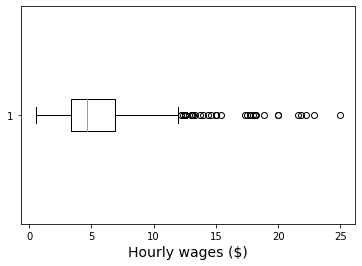

In [66]:
plt.boxplot(data['wage'],       # Create a box plot of the wages
            vert=False);        # Make the plot horizontal   

plt.xlabel('Hourly wages ($)', 
           fontsize=14)         # Label of the x axis

plt.show()

<div class="alert alert-block alert-danger">
<b>Notes:</b>  
    </ul>
        <li> The "minimum" and "maximum" in the boxplot may not be the actual minimum and maximum values in the data set. They could be calculated according to the $1.5\times$IQR rule.</li>
        <li> Observations or samples outside of the $1.5\times$IQR ranges are recognized as "outliers", as they are too distant from the other observations. </li>
        <li> An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. </li>
    </ul>
</div>

You may compare the box plot and the histogram of the wages below, and see if you can relate each value of the box plot with the distribution of the data set.

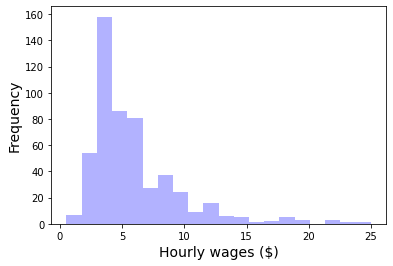

In [67]:
plt.hist(data['wage'], 20,      # Histogram of wages with 20 bins
         color='b', alpha=0.3); # Color is blue, opacity is 0.3  

plt.xlabel('Hourly wages ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

These examples show that with the help of Python, we can achieve some general understanding of the dataset, in terms of descriptive measures, and to visualize such information in an intuitive manner.

The data visualization techniques are also frequently used to explore how variables affect each other. For example, in order to present the relationship between hourly wages and the education experience, we may apply the following code. 

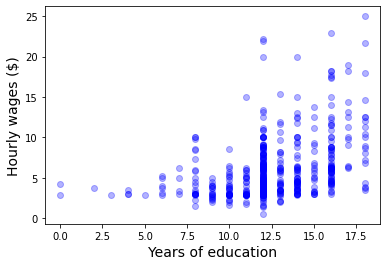

In [68]:
plt.scatter(data['educ'],       # x data is the years of education
            data['wage'],       # y data is the hourly wages
            c='b', alpha=0.3)   # Color is blue, opacity is 0.3     

plt.xlabel('Years of education', fontsize=14)
plt.ylabel('Hourly wages ($)', fontsize=14)

plt.show()

The diagram above also reflects the correlation between variables, which can also be retrieved by the method <code>corr</code> of the <code>pandas.DataFrame</code> objects. 

In [69]:
data.corr()

,wage,educ,exper,married
wage,1.000000,0.405903,0.112903,0.228817
educ,0.405903,1.000000,-0.299542,0.068881
exper,0.112903,-0.299542,1.000000,0.316984
married,0.228817,0.068881,0.316984,1.000000


### Handling missing data <a id="subsection6.4"></a>

It is pretty common that real-world datasets may have some amount of data missing, such as the following GDP data for most countries from the year 1960 to 2018. 

In [2]:
pd.options.display.max_columns = 8
gdp = pd.read_csv('gdp.csv')
gdp

NameError: name 'pd' is not defined

It can be seen that the missing values are indicated by the mark <code>NaN</code>, meaning "not a number", in the data table. Next, we will discuss some basic operations that address missing data.

#### Detecting missing data:  <code>isnull()</code> and <code>notnull()</code>

The method <code>isnull</code> is associated with <code>pandas.DataFrame</code> and <code>pandas.Series</code> objects. It returns <code>True</code> if the item in the table is <code>NaN</code>, and <code>False</code> otherwise. 

In [71]:
gdp.loc[:, '1960':'1961'].isnull()

,1960,1961
0,True,True
1,False,False
2,True,True
3,True,True
4,True,True
...,...,...
210,True,True
211,True,True
212,False,False
213,False,False


In [72]:
gdp['1960'].isnull()

0       True
1      False
2       True
3       True
4       True
       ...  
210     True
211     True
212    False
213    False
214    False
Name: 1960, Length: 215, dtype: bool

The other method, <code>notnull()</code>, as you can tell from the name, returns <code>True</code> if the item is not <code>NaN</code> and <code>False</code> otherwise. It is convenient to use this method for the selection of non-<code>NaN</code> rows from the data frame. For example, we can retrieve all GDP values for the year 1960 that are not <code>NaN</code> by the following code.

In [73]:
gdp_1960 = gdp.loc[gdp['1960'].notnull(),       # Select rows
                   ['Country Name', '1960']]    # Select columns
gdp_1960

,Country Name,1960
1,Afghanistan,5.377778e+08
10,Australia,1.857767e+10
11,Austria,6.592694e+09
13,Burundi,1.960000e+08
14,Belgium,1.165872e+10
...,...,...
204,St. Vincent and the Grenadines,1.306656e+07
205,"Venezuela, RB",7.779091e+09
212,South Africa,7.575397e+09
213,Zambia,7.130000e+08


#### Dropping missing values: <code>dropna()</code>
A more convenient way of selecting items that are not <code>NaN</code> is to use the <code>dropna()</code> method, which also applies to both <code>pandas.DataFrame</code> and <code>pandas.Series</code> objects. We will use a subset of the GDP data to demonstrate how it works.

In [74]:
gdp_subset = gdp.loc[:6, '1981':'1986']
gdp_subset

,1981,1982,1983,1984,1985,1986
0,NaN,NaN,NaN,NaN,NaN,4.054634e+08
1,3.478788e+09,NaN,NaN,NaN,NaN,NaN
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


By default, the <code>dropna()</code> method drops all rows in which any null value is present. As you can see from the following example, rows <code>0</code>, <code>1</code> and <code>3</code> that have <code>NaN</code> values are removed, so there are only four rows left after dropping these rows. 

In [75]:
temp = gdp_subset.dropna()
temp

,1981,1982,1983,1984,1985,1986
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


Please note that in the default setting, the <code>dropna()</code> method returns a new <code>pandas.DataFrame</code> object with the <code>NaN</code> rows removed, while the original data table remain unchanged. 

In [76]:
gdp_subset      # The original data frame remains unchanged

,1981,1982,1983,1984,1985,1986
0,NaN,NaN,NaN,NaN,NaN,4.054634e+08
1,3.478788e+09,NaN,NaN,NaN,NaN,NaN
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


We can also remove the <code>NaN</code> rows from the original data frame by configuring the argument <code>inplace=True</code>. In such cases, the original data frame is overwritten, but the method <code>dropna()</code> returns nothing (<code>None</code>).

In [77]:
temp = gdp_subset.dropna(inplace=True)
print(temp)     # The output of the dropna method is None

None


In [78]:
gdp_subset      # The original data frame is overwritten

,1981,1982,1983,1984,1985,1986
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


You may use the <code>help()</code> function to explore other arguments of the <code>dropna()</code> method, such as <code>axis</code> and <code>how</code>.

Please use the <code>dropna()</code> method to retrieve all GDP values for the year 1960 that are not NaN.

In [7]:
gdp = pd.read_csv('gdp.csv')
gdp1960 = gdp.loc[:,['Country Name', '1960']]
gdp1960.dropna(inplace=True)
gdp1960

,Country Name,1960
1,Afghanistan,5.377778e+08
10,Australia,1.857767e+10
11,Austria,6.592694e+09
13,Burundi,1.960000e+08
14,Belgium,1.165872e+10
...,...,...
204,St. Vincent and the Grenadines,1.306656e+07
205,"Venezuela, RB",7.779091e+09
212,South Africa,7.575397e+09
213,Zambia,7.130000e+08


#### Replacing <code>NaN</code> by other values: <code>fillna()</code>

Sometimes rather than dropping <code>NaN</code> values, you would rather replace them with a valid value, such as zero or a string remark. This can be done by using the <code>fillna()</code> method. 

In [79]:
gdp_subset = gdp.loc[:6, '1981':'1986']
gdp_subset

,1981,1982,1983,1984,1985,1986
0,NaN,NaN,NaN,NaN,NaN,4.054634e+08
1,3.478788e+09,NaN,NaN,NaN,NaN,NaN
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


In [80]:
temp = gdp_subset.fillna('Unknown') # Fill all NaN items with 'Unknown'
temp

,1981,1982,1983,1984,1985,1986
0,Unknown,Unknown,Unknown,Unknown,Unknown,405463417.11746
1,3478787909.09091,Unknown,Unknown,Unknown,Unknown,Unknown
2,5550483035.90815,5550483035.90815,5784341596.36339,6131475065.23832,7553560459.104279,7072063345.44786
3,Unknown,Unknown,Unknown,1857338011.85488,1897050133.42015,2097326250.0
4,388958731.302938,375895956.383462,327861832.946636,330070689.298282,346737964.774951,482000594.03588
5,49333424135.113098,46622718605.284698,42803323345.137604,41807954235.903,40603650231.544502,33943612094.7971
6,78676842366.421295,84307486836.723999,103979106777.910995,79092001998.031998,88416668900.259598,110934442762.694


Similar to the previous case, the argument <code>inplace</code> can be used to determine if the method returns a new data frame or simply overwrite the original data frame without returning anything.

In [81]:
gdp_subset.fillna(0, inplace=True) # Fill all NaN items with zero
gdp_subset

,1981,1982,1983,1984,1985,1986
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.054634e+08
1,3.478788e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,0.000000e+00,0.000000e+00,0.000000e+00,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


## Case Studies <a id="section7"></a>
### Case study 1: Singapore condo prices <a id="subsection7.1"></a>

In [1]:
data = pd.read_csv('condo.csv')
data.head()

NameError: name 'pd' is not defined

Details of the variables are given below:
- <code>name</code>: The name of the condo project.
- <code>price</code>: The total price of the condo, in Singapore Dollars. 
- <code>unit_price</code>: The unit price of the condo, in Singapore Dollars per square feet. 
- <code>district_code</code>: The district code of Singapore, details can be found [here](https://www.mingproperty.sg/singapore-district-code/).
- <code>segment</code>: Three regions of Singapore: Core Central Region (CCR), Rest of Central Region (RCR) and the Outside Central Region (OCR).
- <code>type</code>: The types of condos: "Resale" or "New Sale". 
- <code>level</code>: The levels of the condos.
- <code>remaining</code>: The remaining years of the condo tenures. 
- <code>date</code>: The dates of transactions. 

#### Prices of resale and new sale condos

Use proper data visuals to compare resale and new sale condos.

NameError: name 'pd' is not defined

#### Freehold or 99-year tenure

Create a new column <code>tenure</code> for the dataset <code>data</code> where the value is 1) '99 years' if the value of <code>remaining_years</code> is no larger than 99 years; and 2) 'freehold' if the value of  <code>remaining_years</code> is larger than 99.

#### Condo areas and prices

Considering all **new sale freehold condos smaller than 2000 square feet**, use proper data visualization method to show how condo prices are affected by their areas.

#### Condo prices in different regions

Considering all **new sale freehold condos smaller than 2000 square feet**, use proper data visualization method to show how prices of condos in different regions, CCR, RCR, or OCR, are affected by their areas.